# Обучение бкз учителя

### Задание 1

In [26]:
# подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [14]:
# загрузка датасета бостона
boston = load_boston()

In [9]:
# создаю два датафрейма из датасета бостон для обучения модели
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [21]:
# подключение библиотек для обучения и визуализации данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
# разбиение данных на тренеровочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# масштабирование данных
scaler = StandardScaler() 

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [24]:
# подключаю модуль для визуализации данных в 2D(можно и в 3D)
from sklearn.manifold import TSNE

In [25]:
# обучение модели
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

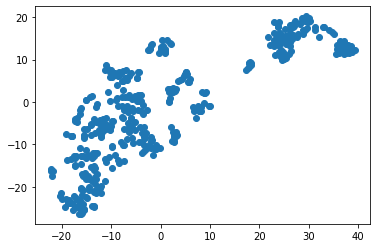

In [27]:
# визуализация
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

In [32]:
# подключил kmeans чтобы разбить данные на 3 кластера
from sklearn.cluster import KMeans

kmeans  = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [38]:
# тренерую модель
labels_train = kmeans.fit_predict(X_train)

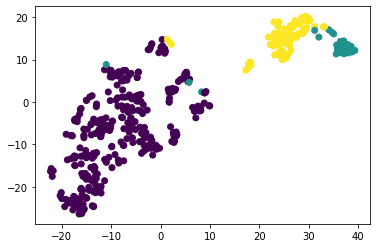

In [41]:
# вывожу данные на график, и распределяю кластеры по цветам
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

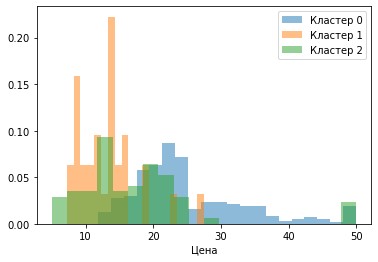

In [45]:
#  другой вид графика данных
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

In [49]:
print('Среднее значение price в каждом кластере:')
print(f'Кластер 0 - {y_train[labels_train == 0].mean()}\n Кластер 1 - {y_train[labels_train == 1].mean()}\nКластер 2 - {y_train[labels_train == 2].mean()}')

Среднее значение price в каждом кластере:
Кластер 0 - 25.16868686868687
 Кластер 1 - 13.196774193548388
Кластер 2 - 17.442105263157895


### Задание 3

In [51]:
# смотрю на тестовых данных kmeans
labels_test = kmeans.predict(X_test)

In [54]:
print('Среднее значение price в каждом кластере:')
print(f'Кластер 0 - {y_test[labels_test == 0].mean()}\n Кластер 1 - {y_test[labels_test == 1].mean()}\nКластер 2 - {y_test[labels_test == 2].mean()}')

Среднее значение price в каждом кластере:
Кластер 0 - 23.91159420289855
 Кластер 1 - 12.814285714285713
Кластер 2 - 17.392307692307693


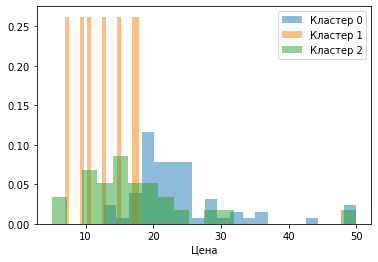

In [55]:
plt.hist(y_test[labels_test == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()